# Задача на регуляризцию

Загрузка данных

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

data = pd.read_csv('data/non_linear.csv', sep=',')
data.head()

degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.119
Качество на обучении: 0.052


C:\Anac_new\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.97795e-18): result may not be accurate.
  overwrite_a=True).T


у класса *Ridge* в конструкторе есть параметр регуляризации - обучите регрессию при $\alpha=0.01$. 

Как изменилась ошибка на обучении? Как изменилась ошибка на валидации? Удалось ли победить переобучение? Используйте степень полинома n=12

In [2]:
# -- ВАШ КОД ТУТ --

degree = 12
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

model = Ridge(alpha=0).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("При alpha=0:")
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

print("\nПри alpha=0.01:")
model = Ridge(alpha=0.01).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

print("\n\nКак изменилась ошибка на обучении? Было 0.125, стало 0.077, т.е. ошибка на обучении падает.")
print("Как изменилась ошибка на валидации? Было 0.051, стало 0.058, т.е. ошибка на валидации растет.")
print("Таким образом, модель переобучилась. Модель с alpha=0.01 хуже, чем модель с alpha=0")
# ------------------

При alpha=0:
Качество на валидации: 0.125
Качество на обучении: 0.051

При alpha=0.01:
Качество на валидации: 0.077
Качество на обучении: 0.058


Как изменилась ошибка на обучении? Было 0.125, стало 0.077, т.е. ошибка на обучении падает.
Как изменилась ошибка на валидации? Было 0.051, стало 0.058, т.е. ошибка на валидации растет.
Таким образом, модель переобучилась. Модель с alpha=0.01 хуже, чем модель с alpha=0


C:\Anac_new\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.81468e-22): result may not be accurate.
  overwrite_a=True).T


### Домашняя работа: Lasso vs Ridge

На данных из файла `data/non_linear.csv`
* сгенерируйте данные до степени *degree = 8* включительно
* обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных
* используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей
* постройте два столбчатых графика, на которых отобразите величину коэффициентов в для Ridge регрессии и Lasso регрессии виде столбиков

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](img/coeff_example.png)

C:\Anac_new\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7134369621139327, tolerance: 0.0024481555784964045
  positive)


Ridge: [ 4.54261785e-01  3.41976833e-01  3.27582091e-02 -2.07134533e-01
  3.63216320e-02  1.18194116e-02 -3.68031932e-03  2.63585521e-04]
Lasso: [-0.00000000e+00 -0.00000000e+00 -1.08299601e-02 -9.52247249e-03
  1.03490179e-03  1.87872250e-04  3.38785318e-06 -2.14838285e-06]


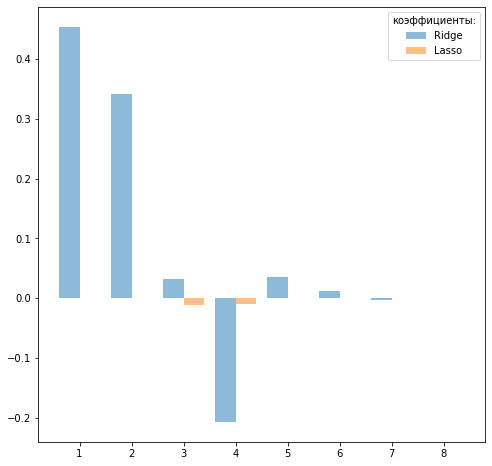

In [3]:
# -- ВАШ КОД ТУТ ---
%matplotlib inline
import matplotlib.pyplot as plt

degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

model_ridge = Ridge(alpha=0.8).fit(X_train, y_train)
model_lasso = Lasso(alpha=0.8).fit(X_train, y_train)

print("Ridge:",model_ridge.coef_)
print("Lasso:",model_lasso.coef_)

n = 9
x1 = np.arange(1, n) - 0.2
x2 = np.arange(1, n) + 0.2

y1 = model_ridge.coef_
y2 = model_lasso.coef_

fig, ax = plt.subplots()
fig.set_figwidth(8)    
fig.set_figheight(8)
ax.bar(x1, y1, width = 0.4, label = 'Ridge', zorder = 2, alpha=0.5)
ax.bar(x2, y2, width = 0.4, label = 'Lasso', zorder = 2, alpha=0.5)
plt.legend(loc='upper right', title='коэффициенты:')
plt.show()
# ------------------

# Домашнее задание: пишем Ridge регрессию.

Мы использовали реализацию Ridge регрессию из библиотеки sklearn. Для того, чтобы  прокачать навыки программирования и освежить в памяти, как перемножать матрицы в numpy, напишите код для вычисления коэффициентов полиномиальной регрессии (для степени *degree=8*) с регуляризацией по формуле
$$
\overline{w} = \left(X^TX + \lambda E\right)^{-1}X^T\overline{y}
$$

Для примера можно ориентироваться на то, как была реализована аналитическая формула для линейной регрессии в модуле "Линейная регрессия. Часть I"

Единичную матрицу $E$ можно получить с помощью функции https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html . Размерность матрицы $k\times k$ (по количеству коэффициентов линейной регрессии). Напоминаю, что количество коэффициентов регрессии совпадает с количеством фичей регрессии, в задании будет $k=8$, т.к. генерим признаки для полинома восьмой степени.

In [4]:
# -- ВАШ КОД ТУТ --
from numpy.linalg import inv, norm
import numpy as np

def ridge_coef(X, y, lambd, intercept=True):
    if (intercept):
        n=X.shape[1]+1
        H = np.ones((X.shape[0],n))
        H[:,1:n] = X
        E = np.zeros((H.shape[1],H.shape[1]))
        E[1:H.shape[1],1:H.shape[1]] = np.identity(H.shape[1]-1, dtype=float)
    else:
        H=X
        E=np.identity(H.shape[1], dtype=float)
    HT = H.transpose() 
    w = np.dot(np.dot(inv(np.dot(HT,H)+lambd*E),HT),y)
    return w

w = ridge_coef(X_train, y_train, 0.8)

print(w)

# -----------------

[ 1.13001041e+00  4.54261788e-01  3.41976835e-01  3.27582082e-02
 -2.07134531e-01  3.63216308e-02  1.18194120e-02 -3.68031937e-03
  2.63585523e-04]


# Домашнее задание: подбираем шаг градиентного спуска 

Очевидно, что чем больше шаг градиентного спуска (параметр *eta0* класса *SGDRegressor*), тем быстрее мы придём к оптимальным значениям. Используя под выше, поиграйтесь с параметром *eta0* и добейтесь , чтобы градиентный спуск закончился быстрее, чем за 200 шагов.

Сколько шагов у вас получилось? Какое качество *RMSE* у Вашего решения? Визуализируйте функцию потерь

Итерации остановлены на шаге 191
RMSE: 0.1318719273796403


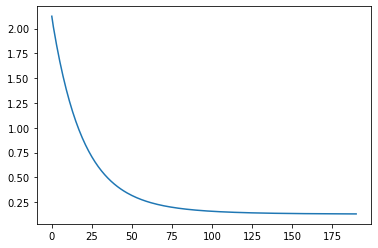

In [5]:
# -- ВАШ КОД ТУТ --
# можно установить None для эксперимента
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# для регрессии
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
%matplotlib inline

data = pd.read_csv('data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

X = data['x_train'].values.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
y = data['y_train'].values

# разбиваем на трейн и валидацию
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

data.head()

rand_state = 42

sgd_regressor = SGDRegressor(
    learning_rate='constant',
    eta0=0.01,
    fit_intercept=True,
    random_state=rand_state
)

# инициализация весов случайным образом
w_current = np.random.random(2)
epsilon = 0.0001

# изменения весов и ошибка на валидации
weight_evolution, rmse_evolution = [], []

for step in list(range(800)):
    # шаг градиентного спуска
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    # отслеживаем изменения весов
    weight_evolution.append(
        distance.euclidean(w_current, sgd_regressor.coef_)
    )
    # проверяем критерий остановки
    if weight_evolution[-1] < epsilon:
        print("Итерации остановлены на шаге %d" % step); break
    rmse_evolution.append(
        mean_squared_error(y_valid, sgd_regressor.predict(X_valid))
    )
    # обновление весов регрессии
    w_current = sgd_regressor.coef_.copy()
    

print("RMSE:", mean_squared_error(y_valid, sgd_regressor.predict(X_valid)))
plt.plot(range(step), rmse_evolution)
plt.show()


# ----------------

# Домашнее задание: SGD на многомерных данных

Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [6]:
import sklearn
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train_scale = sklearn.preprocessing.scale(X_train)
X_test_scale = sklearn.preprocessing.scale(X_test)
# -- ВАШ КОД ТУТ --

rand_state = 42

sgd_regressor = SGDRegressor(
    learning_rate='constant',
    eta0=0.01,
    fit_intercept=True,
    random_state=rand_state
)

# инициализация весов случайным образом
w_current = np.random.random(13)
epsilon = 0.0001

# изменения весов и ошибка на валидации
weight_evolution, rmse_evolution = [], []

for step in list(range(1000)):
    # шаг градиентного спуска
    sgd_regressor = sgd_regressor.partial_fit(X_train_scale, y_train)
    # отслеживаем изменения весов
    weight_evolution.append(
        distance.euclidean(w_current, sgd_regressor.coef_)
    )
    # проверяем критерий остановки
    # print(weight_evolution[-1])
    if weight_evolution[-1] < epsilon:
        print("Итерации остановлены на шаге %d" % step); break
    rmse_evolution.append(
        mean_squared_error(y_test, sgd_regressor.predict(X_test_scale))
    )
    # обновление весов регрессии
    w_current = sgd_regressor.coef_.copy()

y_train_pred = sgd_regressor.predict(X_train_scale)
y_test_pred = sgd_regressor.predict(X_test_scale)
print("Правильность на обучающем наборе: {:.2f}".format(r2_score(y_train, y_train_pred)))
print("Правильность на тестовом наборе: {:.2f}".format(r2_score(y_test, y_test_pred)))

    

# -----------------

Итерации остановлены на шаге 37
Правильность на обучающем наборе: 0.73
Правильность на тестовом наборе: 0.62


# Домашняя работа: добавляем регуляризацию в SGD

В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} 1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i + 2\cdot 1\right)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i + 2x_k\right)& k\neq 0 \\
\end{array}
\right.
$$

В этом модуле мы узнали, как  обучать линейную регрессию, не "упираясь" в аппаратные ресурсы: использовать градиентный спуск.
Мы узнали, как детектировать переобучение модели и закрепили свои знания на примере полиномиальной регрессии и выяснили, как увеличить качество решения с помощью механизма регуляризации. Познакомились с двумя видами регуляризации -  Ridge и Lasso.

Загружаем исходные данные

In [7]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


Код для SGD

In [8]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient(X, y, w, alpha=0) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    m = X.shape[1]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    E = np.ones((n,m))
    errors_with_alpha = np.multiply(E, error)+2*alpha*X
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    pointwise_errors = np.multiply(X, errors_with_alpha) + X
    # print(pointwise_errors.shape, X.shape, error.shape)
    grad = pointwise_errors.sum(axis=0)*(-1.0)*2.0 / n
   
    return grad, error

def eval_w_next(X, y, eta, w_current):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current, 0.1)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    print("Алгоритм выполнился за следующее количество итераций:",step)
    return w

# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008)

Алгоритм выполнился за следующее количество итераций: 22


# Домашнее задание: извлечение признаков из текста

Реализуем пайплайн в виде функции, при помощи которой обработаем все текстовые описания. Для каждого описания
* проводим токенизацию
* удаляем пунктуацию
* приводим к нижнему регистру
* удаляем стоп-слова


Примените процедуру токенизации к файлу brand_tweets_valid.csv

Сколько уникальных токенов получилось?

In [9]:
import string

df = pd.read_csv('data/brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df.drop(df[df.tweet_text.isnull()].index, inplace=True)

def tokenize_text(raw_text: str):
    """Функция для токенизации текста
    
    :param raw_text: исходная текстовая строка
    """
    filtered_tokens = []
    # -- ВАШ КОД ТУТ --
    stop_words = [
        'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
        'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
        'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
        'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
        'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
        'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
        'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
        'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
        'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
        'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'shold',
        "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
        'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
        'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
        'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
    ]
    
    tokens = []
    new_word = True
    for symbol in raw_text:
        if (symbol in string.punctuation) or (symbol == ' '):
            new_word = True
        else:
            if (new_word):
                tokens.append(symbol)
            else:
                tokens[-1] += symbol
            new_word = False
            
    tokens_lower = [i.lower() for i in tokens]
    filtered_tokens = [i for i in tokens_lower if (i not in stop_words)]
    # -----------------
    return filtered_tokens

# применяем функцию в датафрейму с помощью метода .apply()
tokenized_tweets= df.tweet_text.apply(tokenize_text)

# добавляем новую колонку в исходный датафрейм
df = df.assign(
    tokenized=tokenized_tweets
)


df_tokenized = df.tokenized
array_tokens = np.unique(df_tokenized)
all_tokens = []
for list_tokens in array_tokens:
    for token in list_tokens:
        all_tokens.append(token)
        
print(df_tokenized.head())        
print("Количество уникальных токенов:",len(set(all_tokens)))

0    [wow, google, maps, mobile, v5, demo, sxsw, nice]
1    [google, name, built, gettinng, stuff, trying,...
2    [quot, apple, opening, temporary, store, austi...
3    [tech, apple, opening, pop, store, austin, sxs...
4              [gsdm, google, party, hook, sxsw, link]
Name: tokenized, dtype: object
Количество уникальных токенов: 1715


# Домашнее задание: поиск дубликатов в тексте

Потренируйтесь в нахождении матрицы схожести для валидационного сета

загрузите brand_tweets_valid.csv
примените объект vectorizer, обученный на датасете brand_tweets.csv (просто скопируйте этот код из урока)
примените функцию pairwise_distances к полученной матрице
* Пользуясь матрицей схожести, полученной на предыдущем этапе, найдите top-5 твитов, похожих на твит валидационного сета с id=14.

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances

df_valid = pd.read_csv('data/brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df_valid.drop(df_valid[df_valid.tweet_text.isnull()].index, inplace=True)

# -- ВАШ КОД ТУТ --
# применяем функцию в датафрейму с помощью метода .apply()
tokenized_tweets= df_valid.tweet_text.apply(tokenize_text)

# добавляем новую колонку в исходный датафрейм
df_valid = df_valid.assign(
    tokenized=tokenized_tweets
)

vectorizer = CountVectorizer(tokenizer=tokenize_text)
document_matrix = vectorizer.fit_transform(df_valid.tweet_text.values)
source_tweet_index = 14
tweet_distance = 1-pairwise_distances(document_matrix, metric="cosine")
sorted_similarity = np.argsort(-tweet_distance[source_tweet_index,:])

print(df_valid.iloc[sorted_similarity[0]].tweet_text)
print('-------------')
print(df_valid.iloc[sorted_similarity[1]].tweet_text)
print('-------------')
print(df_valid.iloc[sorted_similarity[2]].tweet_text)
print('-------------')
print(df_valid.iloc[sorted_similarity[3]].tweet_text)
print('-------------')
print(df_valid.iloc[sorted_similarity[4]].tweet_text)
# -----------------

Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
-------------
Apple employees just showed up in force to the #SXSW PopUp Apple Store. #iPad2
-------------
#sxsw apple store run out for the day :( boo apple.
-------------
video from the popup Apple store: {link} #sxsw #sxswi
-------------
#SXSW Apple Pop Up Store still has iPads in stock, we are waiting on line {link} via @mention #apple #ipad2‰Ыќ


У вас есть матрица схожести между объектами. Попробуйте решить задачу поиска дубликатов в тексте

1. Визуализируйте гистограмму значений в матрице схожести
1. Напишите функцию на Python, которая принимает индекс твита, пороговое значение (число от $0.0$ до $1.0$ и матрицу схожести, а затем выводит все твиты, схожесть которых больше, чем пороговое значение

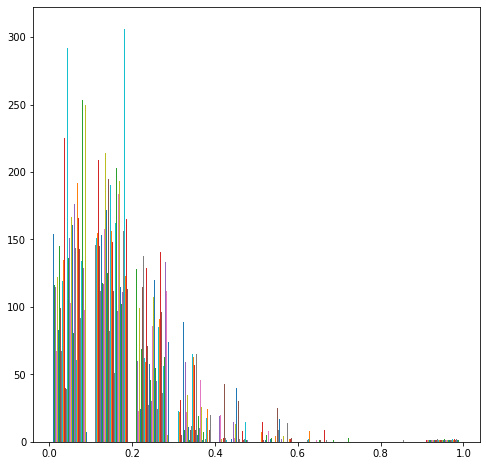

In [11]:
fig, ax = plt.subplots()
fig.set_figwidth(8)    
fig.set_figheight(8)
ax.hist(tweet_distance)
plt.show()

In [12]:
def similar_texts(tweet_index, threshold_value, tweet_distance):
    tweet_index_raw = tweet_distance[tweet_index,:]
    similarity_greater_threshold_value = np.where(tweet_index_raw>threshold_value)[0]
    sorted_similarity = np.argsort(-tweet_distance[tweet_index,:])
    
    func = np.vectorize(lambda t: t in similarity_greater_threshold_value)
    
    sorted_similarity_greater_threshold_value = sorted_similarity[func(sorted_similarity)]
    return sorted_similarity_greater_threshold_value

indexes_most_similar_texts = similar_texts(14, 0.35, tweet_distance)
similar_tweets = df_valid.iloc[indexes_most_similar_texts].tweet_text
similar_tweets

14     Popup Apple Store crew has been giving out wat...
132    Apple employees just showed up in force to the...
16     #sxsw apple store run out for the day :( boo a...
163    video from the popup Apple store: {link} #sxsw...
6      #SXSW Apple Pop Up Store still has iPads in st...
341    Wanting in line at the unconfirmed Apple pop-u...
65     141st in line for #ipad2 at #SXSW (@mention Ap...
23     Cool! Apple to open temporary store at SXSW {l...
226    Hehe RT‰ЫП@mention March 11. Austin, TX. Will ...
72     Apple selling the new Terp2it album? RT @menti...
357    Sitting on the ground waiting for my iPad at t...
395    Crowley and Cashmore think iPad 2 is a minor s...
62     First in line @mention #sxsw @mention store fo...
319    RT@mention Crowley and Cashmore think iPad 2 i...
63     10:30 AM line at Apple pop-up store in Austin....
192    Hi, if came out here for #sxsw and in line at ...
Name: tweet_text, dtype: object